In [1]:
%matplotlib inline
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from data_prep import *


plt.style.use('ggplot')

In [131]:
all45 = read_data_remove_zeros('data/2014_15_All_Grades')
k45 = read_data_remove_zeros('data/2014_15_Kindergarten')
six45 = read_data_remove_zeros('data/2014_15_6th_Grade')
all56 = read_data_remove_zeros('data/2015_16_All_Grades')
k56 = read_data_remove_zeros('data/2015_16_Kindergarten')
six56 = read_data_remove_zeros('data/2015_16_6th_Grade')
all67 = read_data_remove_zeros('data/2016_17_All_Grades')
# k67 = read_data_remove_zeros('data/2016_17_Kindergarten')
# six67 = read_data_remove_zeros('data/2016_17_6th_Grade')
race45=pd.read_csv('data/2014-15_race_data.csv')

In [139]:
race45.info()
race_numbers_columns = ['District Name', 'School Name', 'Total', 'Hispanic / Latino of any race(s)', 'American Indian / Alaskan Native', 'Asian', 
                'Black / African American', 'Native Hawaiian / Other Pacific Islander', 'White', 'Two or More Races']
race_percentage_columns = ['District Name Lower', 'School Name Lower', 'District Name', 'School Name', 'Total', '% Hispanic / Latino of any race(s)', '% American Indian / Alaskan Native', '% Asian', 
                           '% Black / African American', '% Native Hawaiian / Other Pacific Islander', '% White', '% Two or More Races']
race45['District Name Lower'] = race45['District Name'].str.lower()
race45['School Name Lower'] = race45['School Name'].str.lower()
race45_percentage = race45[race_percentage_columns].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 45 columns):
School Year                                   2311 non-null int64
State                                         2311 non-null object
District Code                                 2311 non-null int64
District Name                                 2311 non-null object
School Code                                   2311 non-null int64
School Name                                   2311 non-null object
Total                                         2311 non-null object
Hispanic / Latino of any race(s)              2311 non-null object
American Indian / Alaskan Native              2311 non-null int64
Asian                                         2311 non-null int64
Black / African American                      2311 non-null int64
Native Hawaiian / Other Pacific Islander      2311 non-null int64
White                                         2311 non-null object
Two or More Races            

In [140]:
columns_percent_all45 = ['School_Name', 'School_District', 'K_12_enrollment', 'Percent_with_any_exemption', 'Percent_with_medical_exemption', 'Percent_with_personal_exemption', 'Percent_with_religious_exemption']
all45[all45['Percent_with_any_exemption'] == 0].sort_values('K_12_enrollment', ascending=False)

,School_Name,School_year,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,...,Number_exempt_for_varicella,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade
11,INSIGHT SCHOOL OF WASHINGTON,2014-15,1610.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,411 SOUTH SPARTAN AVE,FORKS,QUILLAYUTE VALLEY SCHOOL DISTRICT,CLALLAM,OLYMPIC EDUCATIONAL SERVICE DISTRICT 114,9-12,N,N
2272,GRANGER MIDDLE SCHOOL,2014-15,1504.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,701 E AVENUE,GRANGER,GRANGER SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,5-8,N,Y
2271,GRANGER HIGH SCHOOL,2014-15,1504.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,701 E AVENUE,GRANGER,GRANGER SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,9-12,N,N
2276,ROOSEVELT ELEMENTARY,2014-15,1504.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,701 E AVENUE,GRANGER,GRANGER SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -4,Y,N
329,WAPATO HIGH SCHOOL,2014-15,797.0,73.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1103 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,9-12,N,N
182,WAPATO MIDDLE SCHOOL,2014-15,797.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1309 KATERI LANE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-8,N,Y
221,SATUS ELEMENTARY,2014-15,698.0,66.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,910 S. CAMAS AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,PK-5,Y,N
508,CAMAS ELEMENTARY,2014-15,677.0,80.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1010 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N
1632,WHITE CENTER HEIGHTS ELEMENTARY,2014-15,590.0,93.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,10015 6TH AVENUE SOUTHWEST,SEATTLE,HIGHLINE SCHOOL DISTRICT,KING,PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,PK-6,Y,Y
2349,HARRAH COMMUNITY CHRISTIAN SCHOOL,2014-15,571.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,50 DANE AVE,HARRAH,MOUNT ADAMS SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,P-8,Y,Y


In [185]:
k45['District Name Lower'] = k45['School_District'].str.lower()
k45['School Name Lower'] = k45['School_Name'].str.lower()
columns_percent_k45 = ['District Name Lower', 'School Name Lower', 'School_Name', 'School_District', 'City', 'County', 'Reported_enrollment', 'Percent_complete_for_all_immunizations', 
                       'Percent_conditional', 'Percent_out_of_compliance', 'Percent_with_any_exemption', 'Percent_with_medical_exemption', 'Percent_with_personal_exemption', 'Percent_with_religious_exemption']
k45_percentage = k45[(k45['Percent_with_any_exemption'] != 0) & (k45['Reported_enrollment'] > 0 )][columns_percent_k45].sort_values('Reported_enrollment', ascending=False)

In [186]:
k45_percentage.set_index(['District Name Lower', 'School Name Lower'], inplace=True)

In [187]:
race45_percentage.set_index(['District Name Lower', 'School Name Lower'], inplace=True)

KeyError: 'District Name Lower'

In [188]:
merge45 = pd.merge(k45_percentage,race45_percentage, how='left',left_index=True, right_index=True)
full_merge = merge45[merge45['District Name'].isna()==False]

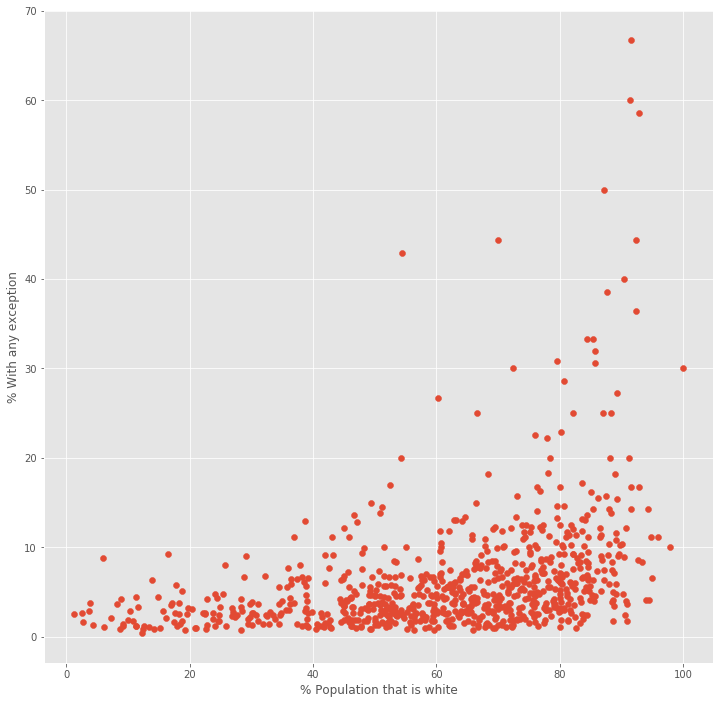

In [202]:
# full_merge.info()
test_full_merge = full_merge[['% White', 'Percent_with_any_exemption']]
# print(test_full_merge)
fig, ax = plt.subplots(1, figsize=(12,12))
ax.scatter(full_merge['% White'], full_merge['Percent_with_any_exemption'], alpha)
ax.set_xlabel('% Population that is white')
ax.set_ylabel('% With any exception');

In [ ]:
pd.plotting.scatter_matrix(full_merge, alpha=0.5, figsize=(12, 12), diagonal='kde')

In [163]:
race45_percentage.loc['enumclaw school district'].head(50)

,District Name,School Name,Total,% Hispanic / Latino of any race(s),% American Indian / Alaskan Native,% Asian,% Black / African American,% Native Hawaiian / Other Pacific Islander,% White,% Two or More Races
School Name Lower,,,,,,,,,,
black diamond elementary,Enumclaw School District,Black Diamond Elementary,297,18.18,0.67,0.00,0.00,0.67,73.06,7.41
byron kibler elementary school,Enumclaw School District,Byron Kibler Elementary School,439,20.50,0.23,0.68,1.59,1.14,69.93,5.92
enumclaw middle school,Enumclaw School District,Enumclaw Middle School,448,10.27,2.46,0.22,1.56,0.00,82.59,2.90
enumclaw sr high school,Enumclaw School District,Enumclaw Sr High School,"1,396",11.10,1.86,0.72,0.57,0.21,82.23,3.30
southwood elementary school,Enumclaw School District,Southwood Elementary School,306,13.40,0.65,0.98,0.65,0.00,80.39,3.92
special ed school,Enumclaw School District,Special Ed School,22,4.55,0.00,0.00,0.00,0.00,90.91,4.55
sunrise elementary,Enumclaw School District,Sunrise Elementary,432,15.74,0.23,0.69,0.93,0.00,80.09,2.31
thunder mountain middle school,Enumclaw School District,Thunder Mountain Middle School,455,12.75,2.20,0.44,0.22,0.22,80.88,3.30
westwood elementary school,Enumclaw School District,Westwood Elementary School,300,19.00,2.33,0.33,1.33,0.00,72.67,4.33


In [ ]:
all45[all45['Reported']=='Y']

In [202]:
all45['ESD'].unique()

array(['NORTHWEST EDUCATIONAL SERVICE DISTRICT 189',
       'EDUCATIONAL SERVICE DISTRICT 112',
       'EDUCATIONAL SERVICE DISTRICT 113',
       'NORTH CENTRAL EDUCATIONAL SERVICE DISTRICT 171',
       'PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121',
       'EDUCATIONAL SERVICE DISTRICT 101',
       'EDUCATIONAL SERVICE DISTRICT 105',
       'OLYMPIC EDUCATIONAL SERVICE DISTRICT 114',
       'EDUCATIONAL SERVICE DISTRICT 123'], dtype=object)

In [18]:
a = all45['K_12_enrollment'].sum()

In [19]:
b = all45['Number_with_any_exemption'].sum()

In [47]:
b

57723.0

In [56]:
district45 = all45.groupby('School_District').sum()[['K_12_enrollment','Number_with_any_exemption', 'Number_with_medical_exemption', 'Number_with_personal_exemption', 'Number_with_religious_exemption', 'Number_with_religious_membership_exemption', 'Number_with_religious_exemption']]

In [59]:
district45.

,K_12_enrollment,Number_with_any_exemption,Number_with_medical_exemption,Number_with_personal_exemption,Number_with_religious_exemption,Number_with_religious_membership_exemption,Number_with_religious_exemption
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,3944.178571,206.153571,40.678571,155.275000,11.725000,4.435714,11.725000
std,7252.693624,472.199127,197.709800,304.133329,23.275799,20.856296,23.275799
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.250000,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000
50%,1136.000000,52.000000,6.000000,42.000000,3.000000,0.000000,3.000000
75%,3964.750000,200.500000,31.250000,147.000000,12.250000,3.000000,12.250000
max,66922.000000,5891.000000,3182.000000,2898.000000,151.000000,324.000000,151.000000


In [53]:
district45['Number_with_any_exemption'].sum()

57723.0

In [164]:
district45.sort_values('Percent_Exempt', ascending=False)

NameError: name 'district45' is not defined

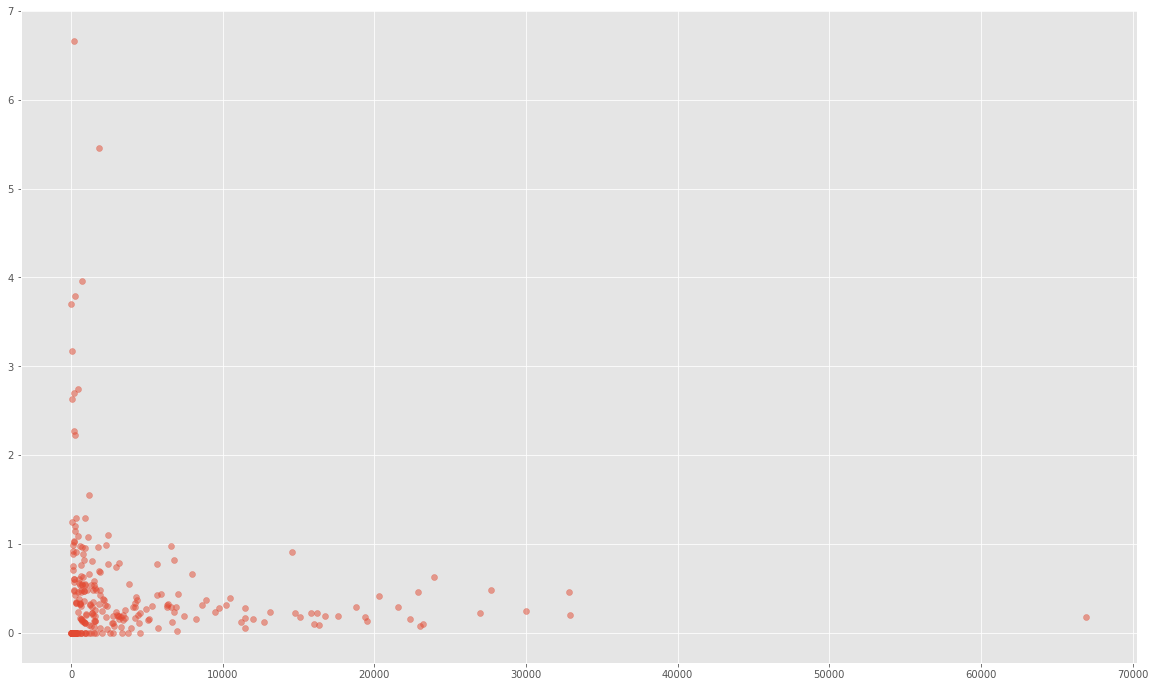

In [41]:
fig, ax = plt.subplots(1,figsize=(20,12))
ax.scatter(district45['K_12_enrollment'], district45['Percent_Exempt'], alpha = .5)

In [236]:
all45[all45['School_District'] == 'LAMONT SCHOOL DISTRICT']

,School_year,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,Percent_exempt_for_pertussis,...,Number_exempt_for_varicella,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade
School_Name,,,,,,,,,,,,,,,,,,,,,
LAMONT MIDDLE SCHOOL,2014-15,32.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,602 MAIN STREET,LAMONT,LAMONT SCHOOL DISTRICT,WHITMAN,EDUCATIONAL SERVICE DISTRICT 101,5-8,N,Y


In [239]:
all45[all45['School_District'] == 'WAPATO SCHOOL DISTRICT']

,School_year,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,Percent_exempt_for_pertussis,...,Number_exempt_for_varicella,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade
School_Name,,,,,,,,,,,,,,,,,,,,,
ADAMS ELEMENTARY,2014-15,299.0,86.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1309 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N
CAMAS ELEMENTARY,2014-15,677.0,80.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1010 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N
PACE ALTERNATIVE HIGH SCHOOL,2014-15,71.0,49.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,310 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-12,N,Y
SATUS ELEMENTARY,2014-15,698.0,66.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,910 S. CAMAS AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,PK-5,Y,N
WAPATO HIGH SCHOOL,2014-15,797.0,73.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1103 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,9-12,N,N
WAPATO MIDDLE SCHOOL,2014-15,797.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1309 KATERI LANE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-8,N,Y


In [241]:
six45[six45['School_District'] == 'WAPATO SCHOOL DISTRICT']

,School_year,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,Percent_exempt_for_pertussis,...,Number_exempt_for_varicella,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade
School_Name,,,,,,,,,,,,,,,,,,,,,
ADAMS ELEMENTARY,2014-15,299.0,86.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1309 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N
CAMAS ELEMENTARY,2014-15,677.0,80.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1010 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N
PACE ALTERNATIVE HIGH SCHOOL,2014-15,71.0,49.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,310 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-12,N,Y
SATUS ELEMENTARY,2014-15,698.0,66.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,910 S. CAMAS AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,PK-5,Y,N
WAPATO HIGH SCHOOL,2014-15,797.0,73.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1103 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,9-12,N,N
WAPATO MIDDLE SCHOOL,2014-15,797.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,1309 KATERI LANE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-8,N,Y


In [23]:
k45[k45['School_District'] == 'WAPATO SCHOOL DISTRICT']

,School_Year,Reported_enrollment,Percent_complete_for_all_immunizations,Percent_conditional,Percent_out_of_compliance,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,...,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade,Location 1
School_Name,,,,,,,,,,,,,,,,,,,,,
ADAMS ELEMENTARY,2014-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,1309 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N,NaN
PACE ALTERNATIVE HIGH SCHOOL,2014-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,310 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-12,N,Y,NaN
WAPATO MIDDLE SCHOOL,2014-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,1309 KATERI LANE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,6-8,N,Y,NaN
WAPATO HIGH SCHOOL,2014-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Y,1103 S. WASCO AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,9-12,N,N,NaN
SATUS ELEMENTARY,2014-15,121.0,95.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,Y,910 S. CAMAS AVENUE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,PK-5,Y,N,NaN
CAMAS ELEMENTARY,2014-15,103.0,96.1,0.0,3.9,0.0,0.0,0.0,0.0,0.0,...,Y,1010 S CAMAS AVE,WAPATO,WAPATO SCHOOL DISTRICT,YAKIMA,EDUCATIONAL SERVICE DISTRICT 105,K -5,Y,N,NaN


In [25]:
all45.head()

,School_year,K_12_enrollment,Percent_complete_for_all_immunizations,Percent_with_any_exemption,Percent_with_medical_exemption,Percent_with_personal_exemption,Percent_with_religious_exemption,Percent_with_religious_membership_exemption,Percent_exempt_for_diphtheria_tetanus,Percent_exempt_for_pertussis,...,Number_exempt_for_varicella,Reported,Address,City,School_District,County,ESD,Grade_Levels,Has_kindergarten,Has_6thGrade
School_Name,,,,,,,,,,,,,,,,,,,,,
BICKLETON ELEMENTARY & HIGH SCHOOL,2014-15,87.0,0.0,1.1,0.0,1.1,0.0,0.0,1.1,1.1,...,1.0,Y,100 MARKET ST.,BICKELTON,BICKLETON SCHOOL DISTRICT,KLICKITAT,EDUCATIONAL SERVICE DISTRICT 105,K -12,Y,Y
CASCADE INDEPENDENT HIGH SCHOOL,2014-15,1.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,Y,1849 MARSHALL AVE,ENUMCLAW,ENUMCLAW SCHOOL DISTRICT,KING,PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,5-12,N,Y
COLTON SCHOOL,2014-15,167.0,0.0,1.8,0.0,1.8,0.0,0.0,1.8,1.8,...,2.0,Y,706 UNION,COLTON,COLTON SCHOOL DISTRICT,WHITMAN,EDUCATIONAL SERVICE DISTRICT 101,PK-12,Y,Y
DECATUR ELEMENTARY,2014-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,DECATUR ISLAND,ANACORTES,LOPEZ SCHOOL DISTRICT,SKAGIT,NORTHWEST EDUCATIONAL SERVICE DISTRICT 189,K -8,Y,Y
FIRWOOD,2014-15,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Y,8805 STEILACOOM BLVD SW,LAKEWOOD,CLOVER PARK SCHOOL DISTRICT,PIERCE,PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,6-12,N,Y


In [26]:
ESD45 = all45.groupby('ESD').sum()[['K_12_enrollment','Number_with_any_exemption',]]

In [27]:
ESD45['Percent_Exempt'] = ESD45['Number_with_any_exemption']/ESD45['K_12_enrollment']*100

In [28]:
ESD45.sort_values('Percent_Exempt', ascending=False)

,K_12_enrollment,Number_with_any_exemption,Percent_Exempt
ESD,,,
EDUCATIONAL SERVICE DISTRICT 101,98160.0,6992.0,7.123064
NORTHWEST EDUCATIONAL SERVICE DISTRICT 189,168131.0,11180.0,6.649577
EDUCATIONAL SERVICE DISTRICT 112,102554.0,6581.0,6.417107
EDUCATIONAL SERVICE DISTRICT 113,71104.0,3861.0,5.430074
OLYMPIC EDUCATIONAL SERVICE DISTRICT 114,42310.0,2239.0,5.291893
PUGET SOUND EDUCATIONAL SERVICE DISTRICT 121,444601.0,22370.0,5.031478
NORTH CENTRAL EDUCATIONAL SERVICE DISTRICT 171,42739.0,1509.0,3.530733
EDUCATIONAL SERVICE DISTRICT 123,71491.0,2051.0,2.868893
EDUCATIONAL SERVICE DISTRICT 105,63280.0,940.0,1.485461


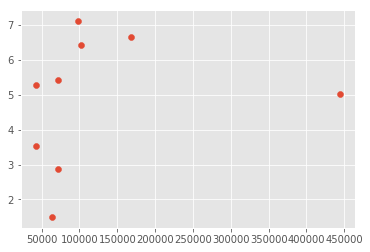

In [29]:
plt.scatter(ESD45['K_12_enrollment'], ESD45['Percent_Exempt'])

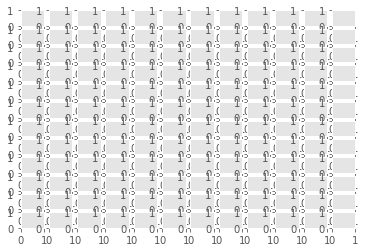

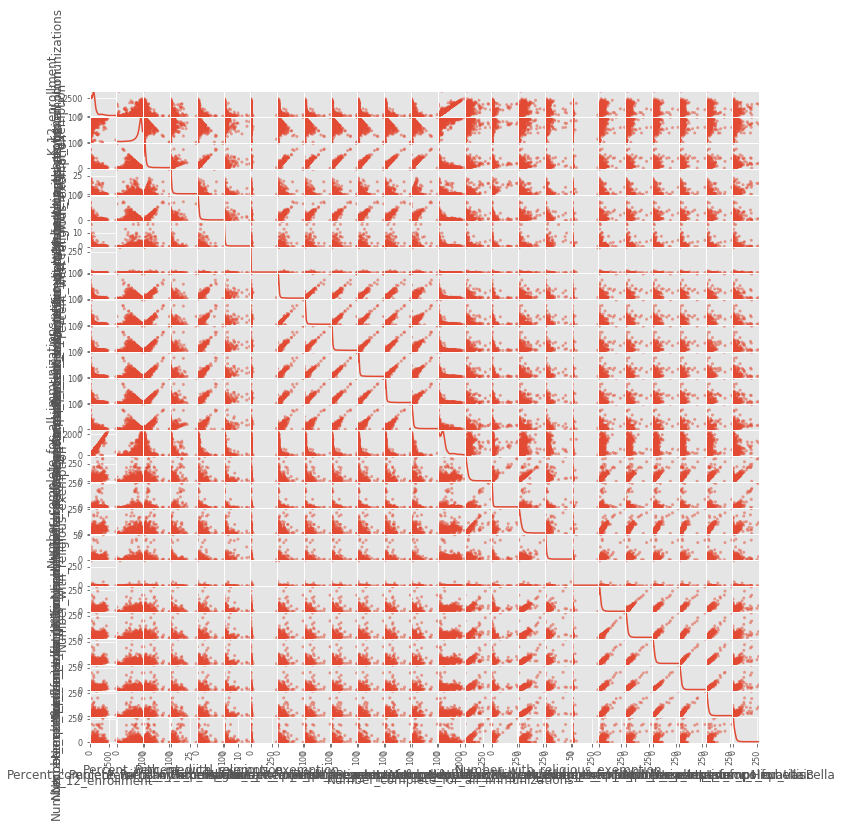

In [8]:
fig, ax = plt.subplots(12,12)
pd.plotting.scatter_matrix(all45, alpha=0.5, figsize=(12, 12), diagonal='kde')